In [67]:
import time
import requests
from configparser import ConfigParser
from concurrent.futures import ThreadPoolExecutor

import matplotlib.pyplot as plt

from tqdm import tqdm

In [107]:
URL_TEMPLATE = "https://cheat-textile-republican-grown.trycloudflare.com/reco/userknn_model/{user_id}"
batch_sizes = [50 * i for i in range(1, 9)]

In [42]:
config = ConfigParser()
config.read("../.config")
params = config["AUTH0"]
SECRET_TOKEN = params["SECRET_TOKEN"]

In [52]:
def make_request(user_id):
    url = URL_TEMPLATE.format(user_id=user_id)
    ts = time.perf_counter()
    resp = requests.get(url, timeout=20, 
                        headers = {"Authorization": "Bearer " + str(SECRET_TOKEN)}
    )
    elapsed = time.perf_counter() - ts
    return elapsed

In [37]:
full_times = []
max_request_times = []

for batch_size in tqdm(batch_sizes):
    ts = time.time()
    with ThreadPoolExecutor(batch_size) as p:
        users = range(batch_size)
        futures = p.map(make_request, users)
        results = list(futures)
    elapsed = time.time() - ts
    full_times.append(elapsed)
    max_request_times.append(max(results))
    time.sleep(1)

100%|██████████| 8/8 [00:22<00:00,  2.75s/it]


Text(0, 0.5, 'max response time')

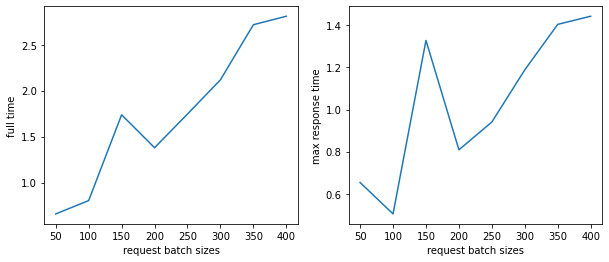

In [38]:
plt.rcParams['figure.figsize'] = 10, 4
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(batch_sizes, full_times)
ax1.set_xlabel('request batch sizes')
ax1.set_ylabel('full time')

ax2.plot(batch_sizes, max_request_times)
ax2.set_xlabel('request batch sizes')
ax2.set_ylabel('max response time')